In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import numpy as np
from numpy.linalg import norm
from pylab import meshgrid,cm
from math import exp
import random
%matplotlib notebook

# WSI - ćwiczenie 2, Algorytmy ewolucyjne i genetyczne

***

### Tomasz Frankowski

***

## Cel zadania
Celem zadania jest minimalizacja sumarycznego kosztu dostawy zasobów do fabryki

## Parametry algorytmu ewolucyjnego
Parametry:<br>
selekcja - ruletkowa <br>
krzyżowanie - jednopunktowe<br>
mutacja - gaussowska<br>
sukcesja - generacyjna

## Funkcja celu wraz z kosztem

In [18]:
# koszt
def koszt(d_M):
    return 1-exp(-d_M)

# Lokalizacja zasobów
z1 = np.array([1,1])
z2 = np.array([-0.5, 1])
z3 = np.array([-1, -0.5])
z4 = np.array([1, -1])

# Funkcja celu
q = lambda x: 20*koszt(abs(z1[0] - x[0])+abs(z1[1] - x[1]))+10*koszt(abs(z2[0] - x[0])+abs(z2[1] - x[1]))+5*koszt(abs(z3[0] - x[0])+abs(z3[1] - x[1]))+10*koszt(abs(z4[0] - x[0])+abs(z4[1] - x[1]))

## Wizualizacja lokalizacji zasobów

<IPython.core.display.Javascript object>


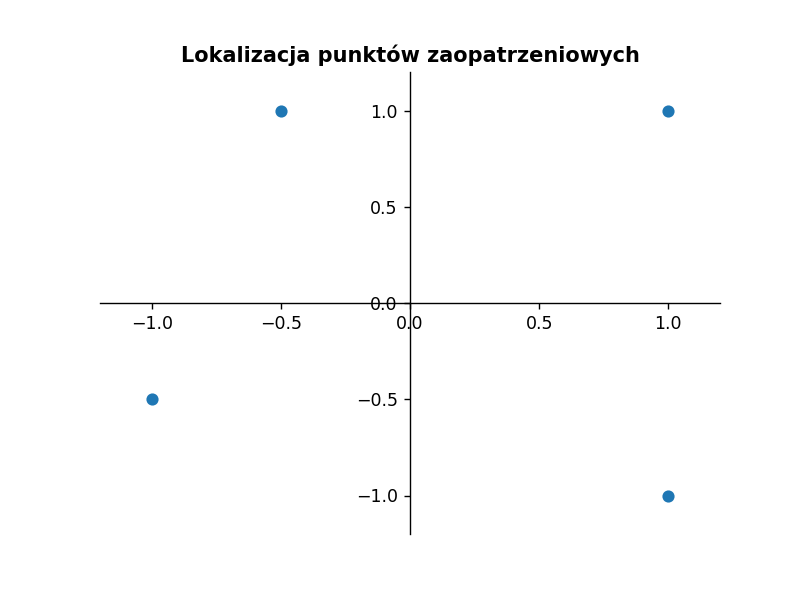

In [4]:
def plot_zasoby():
    # zdefiniowanie 1000 równie rozłożonych punktów na przedziale -2.6, 2.6
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # ulozenie osi na wykresie
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.set_title('Lokalizacja punktów zaopatrzeniowych', fontweight ="bold")
    x = [z1[0], z2[0],z3[0],z4[0]]
    y = [z1[1], z2[1],z3[1],z4[1]]
    plt.scatter(x, y)
    plt.axis([-1.2, 1.2, -1.2, 1.2])

    plt.show()
plot_zasoby()

## Populacja początkowa

In [48]:
# liczba populacji
size = 100
x_populacja = np.random.rand(size,2) # w zakresie 0,0 do 1,1
# modyfikacja danych aby zasięgiem obejmowały punkty zaopatrzeniowe
for i in range(0, size):
    x_populacja[i][0] *= 4
    x_populacja[i][0] += -2
    x_populacja[i][1] *= 4
    x_populacja[i][1] += -2
x_populacja = np.array(x_populacja) # w zakresie -2,-2 do 2,2
x_populacja_kopia = x_populacja

## Wykres populacji

<IPython.core.display.Javascript object>


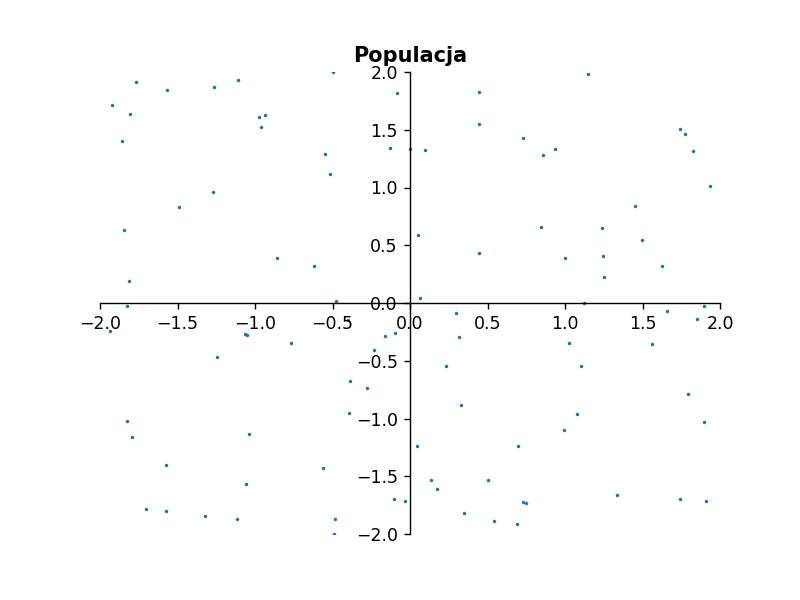

In [49]:
def plot_populacja():
    # zdefiniowanie 1000 równie rozłożonych punktów na przedziale -2.6, 2.6
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # ulozenie osi na wykresie
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.set_title('Populacja', fontweight ="bold")

    plt.scatter(x_populacja[:,0], x_populacja[:,1], s=1)

    plt.axis([-2, 2, -2, 2])

    plt.show()
plot_populacja()

## Funkcje algorytmu ewolucyjnego

In [50]:
# Losowy punkt z rozkładu normalnego
def gauss_distribution_2d():
    return np.random.normal(loc=0, scale=1, size=(2, 1))

# Fitness score każdego elementu z populacji
def ocena(f_celu, wektorPopulacji):
    wektorOcen = np.zeros(len(wektorPopulacji))
    for i in range(0, len(wektorPopulacji)):
        wektorOcen[i] = q(wektorPopulacji[i])
    return wektorOcen

# Minimalny punkt z całego wektora populacji, na podstawie fitness score
def najlepszy(wektorOcen, wektorPopulacji):
    return wektorPopulacji[wektorOcen.argsort()[:1][0]]


# Wektor do reprodukcji ruletkowej
def reprodukcja(wektorOcen, wektorPopulacji):
    reprodukcja = np.zeros(len(wektorPopulacji))
    sumaOcen = wektorOcen.sum()
    for i in range(0, len(wektorPopulacji)):
        reprodukcja[i] = wektorOcen[i]/sumaOcen
    return reprodukcja


# Krzyżowanie jednopunktowe i mutacja gaussowska
def krzyzowanie_mutacja(R, p_m, p_c, wektorPopulacji, sila_mutacji):
    new_population = np.array(np.zeros((len(R),2))) # Nowa populacja

    # W kazdej iteracji wybieram dwóch rodziców i tworze dwójkę dzieci
    for i in range(0, int(len(R)/2)):
        
        # wybor rodzicow do krzyzowania jednopunktowego 
        
        # Reprodukcja ruletkowa
        # Pierwszy rodzic
        first_parent_probability = random.random()
        temp_sum = first_parent_probability
        iter = -1
        while(temp_sum < 1):
            iter+= 1
            temp_sum += R[iter]
        first_parent = wektorPopulacji[iter]
        
        # Drugi rodzic
        second_parent_probability = random.random()
        iter = -1
        temp_sum = second_parent_probability
        while(temp_sum < 1):
            iter+= 1
            temp_sum += R[iter]
        second_parent = wektorPopulacji[iter]
        
        # Prawdopodobieństwo krzyrzowania
        crossing_probability = random.random()
        
        # Tworzenie dzieci
        first_child = np.zeros(2)
        second_child = np.zeros(2)
        
        # Krzyzowanie jednpunktowe
        if(crossing_probability<p_c):
            first_child[0] = first_parent[0]
            first_child[1] = second_parent[1]
            
            second_child[0] = second_parent[0]
            second_child[1] = first_parent[1]
        else:
            first_child = first_parent
            second_child = second_parent
        
        # Prawdopodobieństwo mutacji
        mutation_probability = random.random()
        gauss = gauss_distribution_2d()
        
        # Mutacja gaussowska
        if(mutation_probability < p_m):
            first_child[0] += sila_mutacji*gauss[0]
            first_child[1] += sila_mutacji*gauss[1]
            second_child[0] += sila_mutacji*gauss[0]
            second_child[1] += sila_mutacji*gauss[1]
        
        # Dodanie dzieci do nowej populacji
        new_population[2*i] = first_child
        new_population[2*i+1] = second_child
    return new_population
#krzyzowanie_mutacja(reprodukcja, 0.7, 0.05, x_populacja, 0.1)

## Algorytm ewolucyjny

In [51]:
def algorytm_ewolucyjny(x_populacja_2, maksIteracji, p_m, p_c, silaMutacji):
    t = 0
    wektorOcen = ocena(q, x_populacja)
    x_najlepszy = najlepszy(wektorOcen, x_populacja_2)
    while t < maksIteracji:
        reprodukcja_wektor = reprodukcja(wektorOcen, x_populacja_2)
        x_populacja_temp = krzyzowanie_mutacja(reprodukcja_wektor, p_m, p_c, x_populacja_2, silaMutacji)
        wektorOcen = ocena(q, x_populacja_temp)
        x_najlepszy_temp = najlepszy(wektorOcen, x_populacja_temp)
        if(q(x_najlepszy) > q(x_najlepszy_temp)):
            x_najlepszy = x_najlepszy_temp
            #print(f"Iteracja: {t}, koszt: {q(x_najlepszy)}, punkt: {x_najlepszy}")
        x_populacja_2 = x_populacja_temp
        t+= 1
    return x_najlepszy

In [65]:
maksIteracji = 500
p_m = 0.05
p_c = 0.75
silaMutacji = 0.5
x = algorytm_ewolucyjny(x_populacja, maksIteracji, p_m, p_c, silaMutacji)
print(x)
print(q(x))

[0.5250321  1.01433182]
28.13308599200699


Przykładowy wynik dla następujących hiperparamterów:<br>
maksIteracji = 500<br>
p_m = 0.05<br>
p_c = 0.75<br>
silaMutacji = 0.5

Przykładowy wynik:<br>
koszt: 28.13308599200699, punkt: [0.5250321  1.01433182]

## Wpływ hiperparametrów na działanie algorytmu
Poniżej przetestuje wpływ prawdopodobieństwa mutacji, krzyżowania oraz siły mutacji na działanie algorytmu ewolucyjnego. Sprawdzę metodą eksperymentalną czy ich zmiana ma wpływ na działanie algorytmu. Test będzie polegał na tym że będę zmieniał konkretny hiperparamter, pozostawiając poprzednie w stanie pierwotnym, poprzez dodawnia stałego kroku dla danej ilości testów. Każdy test będzie miał konkretną ilość prób. Wynik tych prób będę uśredniał i potem porównywał z innymi wynikami dla innych wartości danego hiperparametru. Hiperparametr z najmniejszym kosztem wybiore do kolejnego testu dla innego hiperparametru.

## Wpływ prawdopodobieństwa mutacji

In [69]:
x_populacja = x_populacja_kopia
p_m = 0.00

krok = 0.05
ilosc_krokow = 20
ilosc_testow = 4

sredni_punkt = np.zeros(2)
srednia_ocena = 0

hiperparametr_wektor = np.zeros(ilosc_krokow)
srednia_ocena_wektor = np.zeros(ilosc_krokow)
sredni_punkt_wektor = np.zeros((ilosc_krokow,2))
for t in range(0, ilosc_krokow):
    for i in range(0, ilosc_testow):
        x_temp = algorytm_ewolucyjny(x_populacja, maksIteracji, p_m, p_c, silaMutacji)
        srednia_ocena = ((q(x_temp)+srednia_ocena*i)/(i+1))
        sredni_punkt[0] = ((x_temp[0]+sredni_punkt[0]*i)/(i+1))
        sredni_punkt[1] = ((x_temp[1]+sredni_punkt[1]*i)/(i+1))
    
    print(p_m)
    p_m += krok
    hiperparametr_wektor[t] = p_m
    srednia_ocena_wektor[t] = srednia_ocena 
    sredni_punkt_wektor[t] = sredni_punkt


0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.3
0.35
0.39999999999999997
0.44999999999999996
0.49999999999999994
0.5499999999999999
0.6
0.65
0.7000000000000001
0.7500000000000001
0.8000000000000002
0.8500000000000002
0.9000000000000002
0.9500000000000003


In [70]:
print(f"Wektor średnich ocen: {srednia_ocena_wektor}")
najlepszy_punkt = sredni_punkt_wektor[srednia_ocena_wektor.argsort()[:1][0]]
p_m = hiperparametr_wektor[srednia_ocena_wektor.argsort()[:1][0]]
print(f"Najlepsze p_m: {p_m}")

Wektor średnich ocen: [25.32171135 24.95874543 25.72476595 25.72476595 25.72476595 24.99225115
 24.77312312 25.09612048 25.05508967 25.06834085 25.04875263 23.70706951
 25.16823486 23.58306512 25.25274495 23.70376769 23.98255351 24.86830045
 25.35490327 25.06974854]
Najlepsze p_m: 0.7000000000000001


## Wpływ prawdopodobieństwa krzyżowania

In [71]:
x_populacja = x_populacja_kopia
p_c = 0.00

krok = 0.05
ilosc_krokow = 20
ilosc_testow = 4

sredni_punkt = np.zeros(2)
srednia_ocena = 0

hiperparametr_wektor = np.zeros(ilosc_krokow)
srednia_ocena_wektor = np.zeros(ilosc_krokow)
sredni_punkt_wektor = np.zeros((ilosc_krokow,2))
for t in range(0, ilosc_krokow):
    for i in range(0, ilosc_testow):
        x_temp = algorytm_ewolucyjny(x_populacja, maksIteracji, p_m, p_c, silaMutacji)
        srednia_ocena = ((q(x_temp)+srednia_ocena*i)/(i+1))
        sredni_punkt[0] = ((x_temp[0]+sredni_punkt[0]*i)/(i+1))
        sredni_punkt[1] = ((x_temp[1]+sredni_punkt[1]*i)/(i+1))
    p_c += krok
    print(p_c)
    hiperparametr_wektor[t] = p_c
    srednia_ocena_wektor[t] = srednia_ocena 
    sredni_punkt_wektor[t] = sredni_punkt


0.05
0.1
0.15000000000000002
0.2
0.25
0.3
0.35
0.39999999999999997
0.44999999999999996
0.49999999999999994
0.5499999999999999
0.6
0.65
0.7000000000000001
0.7500000000000001
0.8000000000000002
0.8500000000000002
0.9000000000000002
0.9500000000000003
1.0000000000000002


In [72]:
najlepszy_punkt = sredni_punkt_wektor[srednia_ocena_wektor.argsort()[:1][0]]
p_c = hiperparametr_wektor[srednia_ocena_wektor.argsort()[:1][0]]
print(f"Wektor średnich ocen: {srednia_ocena_wektor}")
print(f"Najlepsze p_c: {p_c}")

Wektor średnich ocen: [26.43373195 26.58661607 27.23739535 27.76557233 27.12822515 24.74972297
 27.40248292 26.24982344 26.42332348 26.96730148 28.15148166 24.37968544
 25.09496874 25.17305355 24.80032878 27.16506653 27.3772184  27.62451301
 24.87236766 28.44331189]
Najlepsze p_c: 0.6


## Wpływ siły mutacji

In [73]:
x_populacja = x_populacja_kopia
silaMutacji = 0.00

krok = 0.2
ilosc_krokow = 20
ilosc_testow = 4

sredni_punkt = np.zeros(2)
srednia_ocena = 0

hiperparametr_wektor = np.zeros(ilosc_krokow)
srednia_ocena_wektor = np.zeros(ilosc_krokow)
sredni_punkt_wektor = np.zeros((ilosc_krokow,2))
for t in range(0, ilosc_krokow):

    for i in range(0, ilosc_testow):
        x_temp = algorytm_ewolucyjny(x_populacja, maksIteracji, p_m, p_c, silaMutacji)
        srednia_ocena = ((q(x_temp)+srednia_ocena*i)/(i+1))
        sredni_punkt[0] = ((x_temp[0]+sredni_punkt[0]*i)/(i+1))
        sredni_punkt[1] = ((x_temp[1]+sredni_punkt[1]*i)/(i+1))
    silaMutacji += krok
    print(silaMutacji)
    hiperparametr_wektor[t] = silaMutacji
    srednia_ocena_wektor[t] = srednia_ocena 
    sredni_punkt_wektor[t] = sredni_punkt


0.2
0.4
0.6000000000000001
0.8
1.0
1.2
1.4
1.5999999999999999
1.7999999999999998
1.9999999999999998
2.1999999999999997
2.4
2.6
2.8000000000000003
3.0000000000000004
3.2000000000000006
3.400000000000001
3.600000000000001
3.800000000000001
4.000000000000001


In [74]:
najlepszy_punkt = sredni_punkt_wektor[srednia_ocena_wektor.argsort()[:1][0]]
silaMutacji = hiperparametr_wektor[srednia_ocena_wektor.argsort()[:1][0]]
print(f"Wektor średnich ocen: {srednia_ocena_wektor}")
print(f"Najlepsza siła mutacji: {silaMutacji}")

Wektor średnich ocen: [31.86983692 30.59837406 25.48161181 25.40038115 25.71971031 25.4136014
 23.88599105 27.82325473 25.6036109  29.59398726 25.98052965 27.62548231
 26.41456691 27.75035685 25.77772127 27.25588899 27.65669949 24.6112856
 28.37191144 29.54624266]
Najlepsza siła mutacji: 1.4


## Punkt obliczony dla uzyskanych parameterow

In [78]:
x_temp = algorytm_ewolucyjny(x_populacja, 500, p_m, p_c, silaMutacji)
print(f"Uzyskany punkt: {x_temp}")
print(f"Koszt: {q(x_temp)}")
print(f"p_m: {p_m}")
print(f"p_c: {p_c}")
print(f"Sila mutacji: {silaMutacji}")

Uzyskany punkt: [1.12814429 1.01054092]
Koszt: 24.33807647775376
p_m: 0.7000000000000001
p_c: 0.6
Sila mutacji: 1.4


## Wnioski
Z przeprowadzonych eksperymentów można dojść do wniosku że punktem optymalnym lokalizacji fabryki jest x = [1,1]
Wartość prawdopodbieństwa krzyżowania powinna być w zakresie od około 0.5 do 0.9, sprawdza to się również dla prawdopodobieństwa mutacji. Wartość siły mutacji w seri paru testów powinna być w zakresie od 0.8 do 1.6.
Rozmiar populacji również ma wpływ na otrzymywane wyniki, im jest ona mniejsza tym ciężej algorytmowi dojść do optimum globalnego, dlatego należy podać wiele punktów aby mieć pewność że dojdziemy do minimum globalnego.

Główny wniosek testów jest taki, że dla otrzymanych hiperparametrów mamy większą pewność że algorytm osiągnie minimum globalne niż dla